# Re identificación de personas (ReID) utilizando Triplet Loss y MobileNets

Paper: https://arxiv.org/pdf/1704.04861v1.pdf

Código original: https://github.com/cftang0827/human_recognition

La re identificacion es el proceso de identificar la persona de fotos tomadas de diferentes cámaras o en diferentes ocasiones de la misma cámara con campos de vista no superpuestos (para realizar seguimiento tras cortes en la escena)

El modelo se basa en una variación de la función de pérdida denominada **Triplet Loss** para la re identificación de personas y en **MobileNets**, que utiliza **Depthwise Separable Convolution** para reducir una porción significante del tamaño del modelo y mantener un buen desempeño. Además se utiliza **SSD (Single Shot Detector)** para la detección de personas, el cual obtiene las regiones de interés y las clasifica al mismo tiempo.

# Integrantes:
- Lorena Bustamante Duran
- Jesús Mariaca Mamani
- Roly Inga Valentín
- Alain Alejo Huarachi

# Importación de la API
En este ejemplo se creó una API, la cual es importada, además de otras librerías necesarias.

In [1]:
!git clone https://gitlab.com/javatar/pedestrian_recognition.git data

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 36 (delta 9), reused 0 (delta 0)
Unpacking objects: 100% (36/36), done.
Checking out files: 100% (25/25), done.


In [0]:
!cp -r data/* .

In [3]:
!unzip model.zip

Archive:  model.zip
   creating: model/
  inflating: model/.DS_Store         
   creating: __MACOSX/
   creating: __MACOSX/model/
  inflating: __MACOSX/model/._.DS_Store  
  inflating: model/checkpoint-25000.index  
  inflating: __MACOSX/model/._checkpoint-25000.index  
  inflating: model/checkpoint-25000.meta  
  inflating: __MACOSX/model/._checkpoint-25000.meta  
  inflating: model/deploy.prototxt   
  inflating: __MACOSX/model/._deploy.prototxt  
  inflating: model/MobileNetSSD_deploy.caffemodel  
  inflating: __MACOSX/model/._MobileNetSSD_deploy.caffemodel  
  inflating: model/checkpoint-25000.data-00000-of-00001  
  inflating: __MACOSX/model/._checkpoint-25000.data-00000-of-00001  
  inflating: __MACOSX/._model        


In [4]:
import api
import cv2 
from matplotlib import pyplot as plt
import timeit
plt.ion()
%matplotlib inline


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



INFO:tensorflow:Scale of 0 disables regularizer.


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/checkpoint-25000


Las cargas de pesos del modelo pre entrenado se realiza en el archivo api.py línea 17
# tf.train.Saver().restore(sess, 'model/checkpoint-25000')


# Primer Ejemplo
Para el primer ejemplo se carga una imagen de 3 personas:

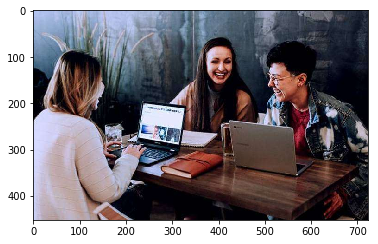

In [5]:
people = cv2.imread('test/people.jpg')[:,:,::-1]
plt.imshow(people)

Seguidamente se llama a la función human_locations que con el modelo pre entrenado con MobileNetSSD que predice las 3 personas de la foto

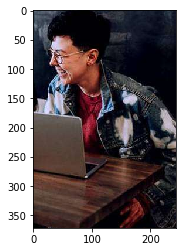

In [6]:
people_location = api.human_locations(people)
people_human = api.crop_human(people, people_location)

for human in people_human:
    plt.imshow(human)
    plt.show()
 

# Segundo Ejemplo
Para el segundo ejemplo se toman 2 imágenes de una escena la serie de TV: The big bang theory, donde aparece Sheldon y un Amigo

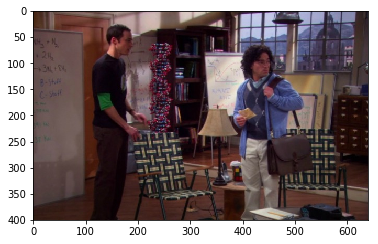

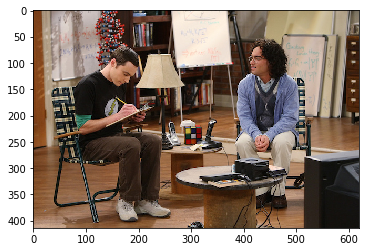

In [7]:
people2 = cv2.imread('test/001.jpg')[:,:,::-1]
people3 = cv2.imread('test/002.jpg')[:,:,::-1]

plt.imshow(people2)
plt.show()

plt.imshow(people3)

Aplicamos la detección de las 2 personas en las 2 imágenes:

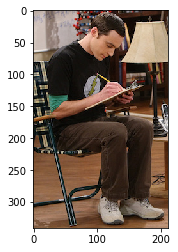

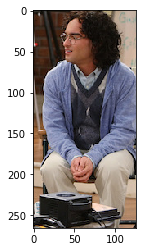

In [8]:
people2_location = api.human_locations(people2)
people2_human = api.crop_human(people2, people2_location)

for human in people2_human:
    plt.imshow(human)
    plt.show()
    
people3_location = api.human_locations(people3)
people3_human = api.crop_human(people3, people3_location)

for human in people3_human:
    plt.imshow(human)
    plt.show()    

Se obtienen los vectores de las personas detectadas a partir de MobileNet

In [9]:
t1 = timeit.default_timer()
human_1_1_vector = api.human_vector(people2_human[0])
human_1_2_vector = api.human_vector(people2_human[1])
human_2_1_vector = api.human_vector(people3_human[0])
human_2_2_vector = api.human_vector(people3_human[1])
t2 = timeit.default_timer()
print('Time elasped: {} sec'.format(round(t2-t1, 3)))

Time elasped: 3.034 sec


# Re identificación
Se calculan las distancias entre las personas detectadas, siendo las más cortas las de las mismas personas

In [10]:
# Sheldon (Foto 1) vs Amigo (Foto 1)
api.human_distance(human_1_1_vector, human_1_2_vector)

24.275356

In [11]:
# Sheldon (Foto 1) vs Sheldon (Foto 1)
api.human_distance(human_1_1_vector, human_2_1_vector)

21.173367

In [12]:
# Sheldon (Foto 1) vs Amigo (Foto 2)
api.human_distance(human_1_1_vector, human_2_2_vector)

26.990524

In [13]:
# Amigo (Foto 1) vs Sheldon (Foto 2)
api.human_distance(human_1_2_vector, human_2_1_vector)

26.507908

In [14]:
# Amigo (Foto 1) vs Amigo (Foto 2)
api.human_distance(human_1_2_vector, human_2_2_vector)

19.721474

In [15]:
# Sheldon (Foto 1) vs Amigo (Foto 2)
api.human_distance(human_2_1_vector, human_2_2_vector)

19.289532